In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
a=[0,0,1,1,0,0,
   0,1,0,0,1,0,
   1,1,1,1,1,1,
   1,0,0,0,0,1,
   1,0,0,0,0,1]
b=[0,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0]
c=[0,1,1,1,1,0,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,1,1,1,0]

In [65]:
y=[[1,0,0],
   [0,1,0],
   [0,0,1]]

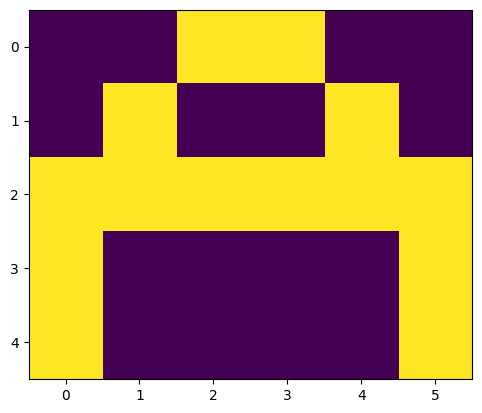

In [66]:
#visualize the data
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [ ]:
#convert data and labels to numpy arrays
x=[np.array(a).reshape(1,30),np.array(b).reshape(1,30),np.array(c).reshape(1,30)]
Y=np.array(y)
print(x,"\n\n",Y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [ ]:
#imput (1,30)
#hidden(1,5)
#output (3,3)

In [68]:
#activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [69]:
#creating forward neural networks
def f_forward(x, w1, w2):
    #hidden layer
    z1 = np.dot(x, w1)
    a1 = sigmoid(z1) 
    #output layer
    z2 = np.dot(a1, w2)
    a2 = sigmoid(z2) 
    return a2

In [70]:
#initialize the weights
def generate_wt(x,y):
    l=[]
    for i in range(x*y):
        l.append(np.random.randn())
    return np.array(l).reshape(x,y)

In [71]:
def loss(out, y):
    s= np.square(out - y)
    s=np.sum(s)/len(y)
    return s


In [72]:
#back propagation
def back_prop(x, y, w1, w2, alpha):
    #hidden
    z1=x.dot(w1)
    a1=sigmoid(z1)
    #output layer
    z2=a1.dot(w2)
    a2=sigmoid(z2)

    d2 = a2 - y
    d1=np.multiply((w2.dot((d2.transpose()))), np.multiply(a1, (1-a1)))

    #gradient
    w1_adj= x.transpose().dot(d1)
    w2_adj= a1.transpose().dot(d2)

    w1=w1 - (alpha * w1_adj)
    w2=w2 - (alpha * w2_adj)    
    return w1, w2

In [80]:
def train(x,y,w1,w2,alpha=0.01,epoch=10):
    acc=[]
    los=[]
    for j in range(epoch):
        l=[]
        for i in range(len(x)):
            out=f_forward(x[i], w1, w2)
            l.append(loss(out, y[i]))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("Epoch:", j+1, "acc:",(1-(sum(l)/len(x)))*100)
        acc.append((1-(sum(l)/len(x)))*100)
        los.append(sum(l)/len(x))
    return w1, w2, acc, los

In [81]:
def predict(x, w1, w2):
    out = f_forward(x, w1, w2)
    maxm=0
    k=0
    for i in range(len(out[0])):
        if out[0][i] > maxm:
            maxm = out[0][i]
            k = i
    if k == 0:
        print("Image is of letter A")
    elif k == 1:
        print("Image is of letter B")   
    else:
        print("Image is of letter C")
    plt.imshow(x.reshape(5,6))
    plt.show()

In [84]:
w1=generate_wt(30,5)
w2=generate_wt(5,3)
print(w1,w2)

[[-1.06448302e+00 -3.64112124e-01  1.48123512e+00 -7.71263207e-01
  -1.22911405e+00]
 [ 7.27786365e-01  8.15292893e-01 -9.65998577e-01  1.17318479e+00
  -1.00469622e+00]
 [-2.70348081e-01 -3.74280118e-01 -2.00159712e-01  1.23686010e+00
  -9.69460619e-01]
 [ 1.76046105e-01 -4.41945544e-01  1.75307438e+00  1.01005183e+00
   1.16003214e+00]
 [ 9.10336170e-01 -2.61209677e-01  1.33166649e+00 -7.63109061e-01
  -1.82434779e-01]
 [-1.19318727e-01  5.54522454e-01  1.52820064e+00 -1.12348310e+00
  -2.89991196e-01]
 [ 1.12100244e+00  2.30614996e-01 -1.29750375e-01 -1.00773198e+00
   4.42198539e-01]
 [-5.02848674e-02 -7.65656250e-01  1.12426182e+00 -5.67194581e-01
  -8.44288691e-01]
 [ 6.10973729e-01  1.03635698e+00 -2.28464582e+00 -5.14139569e-01
  -1.10846147e-01]
 [ 9.87443726e-01  7.43136670e-02 -3.91804329e-02  3.34687586e-01
  -3.43604559e-01]
 [ 6.85774363e-01  1.51695111e+00 -1.71418824e-01  1.51925822e+00
  -9.17176279e-01]
 [-5.80716666e-01 -4.21729057e-01 -6.48834046e-01 -1.46082177e+00

In [83]:
w1, w2, acc, los = train(x, y, w1, w2,0.1,100)

ValueError: shapes (30,1) and (5,5) not aligned: 1 (dim 1) != 5 (dim 0)

In [85]:
import matplotlib.pyplot as plt1
plt1.plot(acc)
plt1.xlabel("Epochs")   
plt1.ylabel("Accuracy")
plt1.show()

NameError: name 'acc' is not defined

In [ ]:
plt1.plot(los)
plt1.xlabel("Epochs")
plt1.ylabel("Loss")
plt1.show()

In [ ]:
print(w1,"\n\n",w2)

In [ ]:
predict(x[2],w1,w2)# Pandas Assignment
import pandas as pd
## 1. Create a DataFrame with given data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve'],
    'Age': [24, 27, 22, 32, 29],
    'Department': ['HR', 'Finance', 'IT', 'Marketing', 'HR'],
    'Salary': [45000, 54000, 50000, 62000, 47000]
}

df = pd.DataFrame(data)

# a. First five rows
print("DataFrame:")
print(df.head())

# b. Summary statistics of Age and Salary
print("\nSummary statistics:")
print(df[['Age', 'Salary']].describe())

# c. Average salary in HR department
avg_salary_hr = df[df['Department'] == 'HR']['Salary'].mean()
print("\nAverage salary in HR department:", avg_salary_hr)
## 2. Add a new column 'Bonus' (10% of Salary)
df['Bonus'] = df['Salary'] * 0.10
print(df)
## 3. Filter employees aged between 25 and 30
filtered = df[(df['Age'] >= 25) & (df['Age'] <= 30)]
print(filtered)
## 4. Group by Department and calculate average salary
dept_avg_salary = df.groupby('Department')['Salary'].mean()
print(dept_avg_salary)
## 5. Sort by Salary and save to CSV
sorted_df = df.sort_values(by='Salary', ascending=True)
print(sorted_df)

# Save to CSV
sorted_df.to_csv("pandas_assignment_sorted.csv", index=False)